# Predictive Analysis of Student Performance in Math Courses using R and glmnet

In this Machine Learning (ML) tutorial, we'll explore the realm of predictive analytics with a focus on student performance in math courses. Our goal is to leverage predictive modeling to identify students who may require additional academic support, potentially guiding them towards private lessons to enhance their learning outcomes. Utilizing the `glmnet` library in R, we aim to demonstrate a comprehensive approach to predicting student grades based on various socio-economic and school-related factors.

## Dataset Overview

We base our analysthe student datasetRdata`, sourced from detailed records of student achievements in Portuguese schools. These datasets provide a rich tapestry of data encompassing students' math grades, socio-economic backgrounds, and school-related characteristics. Below is a brief overview of the types of data we'll be examining:

- **Math Grade:** The primary focus of our analysis, representing students' final grades in math.
- **Socio-economic Characteristics:** Attributes detailing students' family backgrounds, parents' occupations, home resources like internet access, and additional factors that could influence academic performance.
- **School Related Features:** Information covering school attendance, study habits, previous academic failures, absences, and other relevant variables.

For an in-depth look at all the variables included in our datasets, please consult the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance) for a comprehensive data description.

## Tutorial Outline

This tutorial is structured to guide participants through the entire process of a machine learning project, from initial data handling to the final stages of model evaluation and prediction. Here’s what rmat for modeling.

### Model Training
With the `glmnet` package, we'll fit a generalized linear model to our training data. This phase involves feature selection and model parameter tuning to optimize our predictive model's performance.

### Evaluation and Prediction
We'll assess our model's accuracy using the test dataset, evaluating its effectiveness in predicting math grades. This step will enable us to identify students who could benefit from additional educational support.

This tutorial offers more than just a walkthrough of machine learning implementation; it provides a deeper understanding of the data and strategic insights necessary for impactful predictive modeling in the educational domain. Whether you're an experienced data scientist or a newcomer to the field, this tutorial promises to enrich your knowledge and skills in educational data analytics.


# Preparing the Environment and Loading Datasets in R

Before diving into our analysis, it's crucial to prepare our R environment by loading the necessary libraries and setting the appropriate working directory. This ensures that all functions and datasets required for our work are readily available. Here, we begin by loading two key libraries: `glmnet` for elastic-net regularized regression models and `dplyr` for data manipulation. 

Next, we set the working directory to the path where our datasets are located. This step is important as it allows us to directly reference our files without needing to specify their full paths, streamlining the process of loading data. The datasets we're working with are stored as `.csv` files.


In [15]:
library(glmnet)
library(dplyr)


# Change the working directory to where the datasets are located
setwd("/home/jupyter-mlcourseuser/M02-Machine-Learning/self_study_tutorial/scripts_and_data")

# Load the training dataset
train = read.csv("train.csv")

# Load the test dataset
test = read.csv("test.csv")


# Estimating Linear Regression to Predict Student Performance

In this section of our tutorial, we focus on estimating a linear regression model to predict students' final math grades (G3) based on a variety of socio-economic and school-related features. Linear regression is a basic yet powerful statistical method that elucidates the relationship between one dependent variable and one or more independent variables.

The core idea is to fit a linear equation to observed data, which, in our case, involves using the `lm()` function in R. The `lm()` function, which stands for linear model, requires a formula specifying the model to be fitted and the dataset for the model fitting.

After fitting our model, we'll proceed to assess its performance. We do this by predicting math grades on our test dataset and then calculating the Mean Squared Error (MSE) of these predictions. MSE is a critical measure that quantifies the average of the squares of errors; essentially, it's the average squared difference between the observed actual outcomes and the predictions made by the model. Generally, a lower MSE signifies a model with high accuracy in its predictions.

Let's proceed with the code implementation:


In [16]:


# Fit the linear regression model
ols <- lm(G3 ~ ., data = train)
# Display the summary of the model to understand its performance
summary(ols)

# Predicting the math grades for the test dataset
test$predols <- predict(ols, newdata = test)

# Calculating the Mean Squared Error (MSE) for our predictions
predMSEols <- mean((test$G3 - test$predols)^2)
# Print the MSE to the console
print(predMSEols)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5524 -1.9313  0.1568  1.8190  8.5320 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.62145    3.68541   3.967 0.000103 ***
sex         -0.62733    0.49221  -1.275 0.204052    
age         -0.16293    0.19173  -0.850 0.396517    
address     -0.42789    0.53423  -0.801 0.424171    
famsize     -0.47520    0.46329  -1.026 0.306346    
Pstatus      0.26090    0.63117   0.413 0.679816    
Medu         0.34875    0.25380   1.374 0.171046    
Fedu         0.09652    0.23729   0.407 0.684661    
traveltime   0.22792    0.32065   0.711 0.478090    
studytime    0.68759    0.27570   2.494 0.013496 *  
failures    -0.69699    0.32437  -2.149 0.032934 *  
schoolsup   -3.47010    0.67917  -5.109 7.91e-07 ***
famsup      -0.76877    0.46120  -1.667 0.097202 .  
paid        -0.39143    0.44383  -0.882 0.378945    
activities   0.22703    0.42261   0.537 0.591760    
n

[1] 9.300887


##  Mean Squared Error (MSE) Overview

The **Mean Squared Error (MSE)** is a critical metric in supervised learning, used to evaluate the performance of a predictive model. It calculates the average squared difference between the actual observed values and the model's predictions:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $n$ is the number of observations, $y_i$ the actual value, and $\hat{y}_i$ the predicted value.

### Objective

- **Minimize MSE**: A lower MSE indicates a model that predicts more closely to the actual observations, showing higher accuracy.

### Interpreting MSE: 9.300887

- **Contextual Value**: MSE needs to be interpreted in relation to the scale of the target variable and compared to benchmarks or other models.
- **Indication of Error**: An MSE of 9.300887 suggests that the model's predictions deviate from the actual values, with the squared average of these deviations being around 9.3. This value aids in understanding the model's accuracy.
- **Improvement Marker**: Reductions in MSE across model iterations signal improvements in predictive accuracy, keeping in mind the balance with overfitting concerns.

The goal is to develop a model that not only minimizes MSE but also generalizes well across different datasets.
fferent datasets.


## Addressing Challenges of High-Dimensional Data in Modeling

In both academic research and practical applications, we often encounter datasets with a large number of variables. This abundance of data can theoretically enable us to build more accurate and nuanced models, yet it introduces significant challenges:

- **Overfitting:** The model learns the noise in the training data to the extent that its performance on unseen data is adversely affected. This issue becomes more pronounced as the number of variables increases, especially when the number of variables exceeds the number of observations.
- **Computational Inefficiencies:** Handling a vast number of variables can lead to computational challenges, making the modeling process slower and more resource-intensive.
- **Difficulties in Model Interpretation:** A large set of variables can make it harder to understand which factors are genuinely influencing the outcome, complicating the interpretation of the model's results.

In such scenarios, traditional regression models may not perform optimally, highlighting the need for more sophisticated approaches. **Lasso regression** emerges as a powerful solution in this context, aiming not only to prevent overfitting but also to enhance model interpretability through effective variable selection.


# Lasso and Ridge Regression

## Lasso Regression

The **Lasso** (Least Absolute Shrinkage and Selection Operator) is a regression technique that enhances the traditional least squares approach by incorporating a penalty on the absolute size of the coefficients. This approach not only minimizes prediction errors but also simplifies models by enforcing sparsity through variable selection.

### Objective Function:

The Lasso aims to solve:

$$ \min_{\beta} \left\{ \sum_{i=1}^{N} (Y_i - \gamma - \sum_{j=1}^{p} X_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}, $$

where:
- $N$ is the number of observations.
- $Y_i$ is the observed outcome for observation $i$.
- $\gamma$ is the model intercept.
- $X_{ij}$ is the value of the $j$th predictor for the $i$th observation.
- $\beta_j$ is the coefficient for the $j$th predictor.
- $p$ is the total number of predictors.
- $\lambda \geq 0$ is the regularization parameter controlling the penalty strength.

### Key Characteristics:

- **Variable Selection:** By penalizing the absolute size of coefficients, Lasso can shrink some coefficients to exactly zero. This means Lasso performs both variable selection and regularization, identifying a simpler, more interpretable model.
- **Regularization:** Lasso controls overfitting by penalizing large coefficients, making it robust against the inclusion of irrelevant variables.
- **Penalization and OLS:** When $\lambda = 0$, Lasso reduces to ordinary least squares (OLS) regression. As $\lambda$ increases, the impact of penalization grows, enhancing variable selection and model simplicity.

## Ridge Regression

**Ridge Regression** is another regularization technique that modifies least squares estimation by adding a penalty on the squared magnitude of coefficients. Unlike Lasso, Ridge regression does not reduce coefficients to zero but instead shrinks them towards zero.

### Objective Function:

Ridge regression seeks to minimize:

$$ \min_{\beta} \left\{ \sum_{i=1}^{N} (Y_i - \gamma - \sum_{j=1}^{p} X_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}. $$

### Key Characteristics:

- **Shrinkage:** The penalty on the square of coefficients ensures that Ridge regression significantly reduces the variance of the model without substantial increase in bias, making it particularly useful in the presence of multicollinearity.
- **No Zero Coefficients:** Ridge regression does not perform variable selection; it merely shrinks the size of coefficients.
- **Dense Models:** It is preferred when the true underlying model is expected to have many small/medium-sized effects rather than a few large ones.

## Choosing Between Lasso and Ridge

- **Variable Selection:** Opt for Lasso when you need a model that is easy to interpret or when you suspect only a subset of predictors are truly important.
- **Multicollinearity:** Use Ridge when dealing with highly correlated data to reduce overfitting while retaining all predictors in the model.
- **Model Complexity:** Lasso can simplify models by eliminating variables, while Ridge adjusts relationships among variables without excluding any.

By understanding the nuances of Lasso and Ridge regression, you can better tailor your modeling approach to the specific characteristics of your data, leading to more accurate and interpretable models.


## Linear Regression Meets Lasso Penalty

In this step, we transition from traditional linear regression to a more sophisticated approach by estimating a Lasso model. By selecting the first 25 columns as predictors, we introduce the Lasso penalty (`alpha = 1`) into our regression analysis. This method not only helps in minimizing the sum of squared residuals but also imposes a constraint on the absolute size of the regression coefficients. Such a constraint encourages sparsity in the model parameters, effectively performing feature selection and enhancing model interpretability. Here, `train$G3` serves as our response variable, and we're aiming to predict its values based on the predictors specified. We then create a regression visualisation.


In [17]:
# Estimate a Lasso model using the first 25 columns as predictors
lasso <- glmnet(as.matrix(train[,c(1:25)]), train$G3, alpha = 1)

## Visualizing Lasso Regression Coefficients: Exploring Regularization Effects

- **Lasso Regression Visualization**:
  - The plot represents the coefficients of a Lasso regression model for different values of the regularization parameter, lambda.
  - On the x-axis, we have 'Log Lambda', indicating that lambda values have been log-transformed for better visualization.
  - The y-axis shows the coefficients for the predictors in the model.
  - Each line represents one of the 25 predictors used in the model.
  - Numbers at the top indicate the number of nonzero coefficients at the corresponding lambda value.

- **Interpreting the Behavior**:
  - As lambda increases (towards the left on the x-axis), the shrinkage effect increases, pushing more coefficients toward zero.
  - The vertical lines show where the coefficients become exactly zero, effectively removing them from the model.
  - When lambda is small (towards the right), there is less penalty, and hence more predictors are included in the model with non-zero coefficients.

- **Optimal Lambda**:
  - The 'elbow' or the point where the lines start to converge toward zero represents the optimal trade-off point for lambda.
  - This is typically chosen by cross-validation to balance model complexity with prediction error.


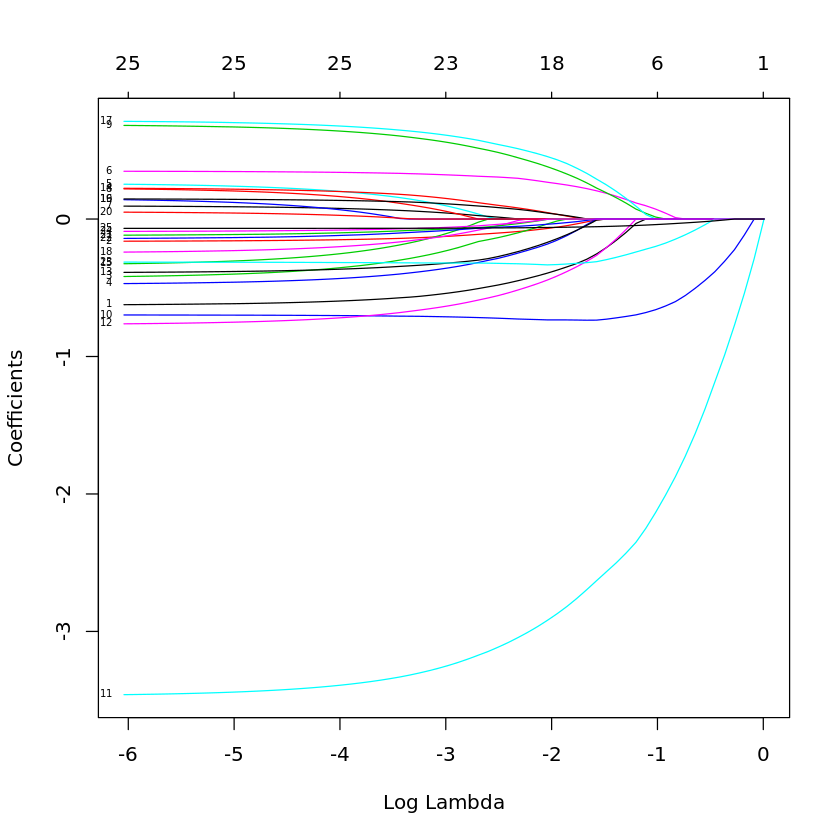

In [18]:
plot(lasso, xvar = "lambda", label = TRUE)

## Optimizing Regularized Regression: Tuning $\lambda$ through Cross-Validation

In the realms of Lasso and Ridge regression, the penalty term $\lambda$ is paramount, as it directly influences model complexity and prediction accuracy. Understanding the optimal selection of $\lambda$ requires a grasp of cross-validation techniques and the variance-bias trade-off, foundational concepts in statistical learning.

### Cross-Validation Process Detailed

Cross-validation (CV) is a robust method for assessing the predictive performance of statistical models and for determining the optimal tuning parameters such as $\lambda$. Here's a closer look at how CV facilitates this process:

1. **Partitioning:** The dataset is split into $k$ equally sized segments or folds. This stratification ensures that every data point is given an opportunity to be tested against a model trained on data it has not seen. This method is essential for evaluating the generalizability of a model.

2. **Grid of $\lambda$ Values:** A comprehensive range of $\lambda$ values is considered to identify the penalty level that best balances model complexity with predictive accuracy. This range typically spans from very low (leading to less regularization) to relatively high values (leading to more regularization).

3. **Model Estimation and Validation:** For each value of $\lambda$, the model is trained on $k-1$ folds and then tested on the fold that was held out. The key metric for evaluation can vary but often includes the Mean Squared Error (MSE) for quantitative outcomes.

4. **Averaging Prediction Errors:** This iterative process of training and validation across all folds for each $\lambda$ produces a series of average errors, reflecting the model's performance across different levels of regularization.

5. **Selecting $\lambda$:** The optimal $\lambda$ is typically the one that minimizes the cross-validated prediction error. However, to favor model simplicity, the one-standard-error rule may be applied. This rule selects the simplest model whose error is no more than one standard error above the error of the model with the lowest cross-validated error.

### Understanding Variance-Bias Trade-off and Its Connection to Cross-Validation

The variance-bias trade-off is a fundamental concept to grasp when tuning the regularization parameter \(  $\lambda$ \) in Lasso and Ridge regression models. 

- **High Bias**: A model with high bias tends to be oversimplified, which means it does not capture the complexities or patterns in the training data adequately, leading to underfitting. Such models, while not fluctuating much with varying training data, do not perform well even on the data they were trained on.

- **High Variance**: On the other hand, a model with high variance pays exceedingly close attention to the training data, to the point of capturing the random noise as if it were a significant pattern. This overfitting results in a model that may perform well on the training set but fails to generalize to unseen data.

- **Balancing with  $\lambda$**: The regularization parameter \(  $\lambda$ \) serves as a tuning knob to balance this trade-off. As \(  $\lambda$) increases, the complexity of the model typically decreases, leading to higher bias and lower variance. Conversely, decreasing \(  $\lambda$ ) leads to a more complex model with lower bias and higher variance.

#### Linking to Cross-Validation

Cross-validation plays a critical role in this balancing act:

- **Model Evaluation**: Through cross-validation, we can evaluate how well our model performs across different subsets of the data. It allows us to estimate the model's error on unseen data, providing an indication of how well the model will generalize.

- **Optimal \( $\lambda$ \) Selection**: By using cross-validation, we can select the \( $\lambda$ \) that results in the lowest error across the validation sets. This process helps to ensure that we are not overfitting to the training data and that the model maintains a capacity to generalize well to new data.

- **Trade-off Visualization**: Cross-validation can also help us visualize the bias-variance trade-off. It provides a curve (often called a validation curve) that shows the error metric (e.g., MSE) for various \( $\lambda$ \) values. The "elbow" or bottom of this curve is where the optimal \( $\lambda$ \) is often found, striking a balance between bias and variance.

In essence, cross-validation assists in identifying the right level of model complexity which is robust enough to perform consistently across different data samples without overfitting.

#### Setting the Stage

Before we begin, it's important to set a seed for replicability. This ensures that our results are consistent and can be reproduced by anyone rerunning the same code.


In [19]:
set.seed(27112019)

In [35]:
# Perform cross-validation to find the optimal lambda value
lasso.cv <- cv.glmnet(as.matrix(train[,c(1:25)]), train$G3, type.measure = "mse", nfolds = 5, alpha = 1)



# Understanding the Bias-Variance Trade-off with an image

The cross-validation plot is a visual tool that demonstrates the bias-variance trade-off in Lasso regression:

- **Increased Bias**: High values of \( $\lambda$ \) on the right of the plot indicate a model with higher bias. This means the model may be too simple and not capture all the complexities of the data, potentially leading to higher errors on the training set.

- **Increased Variance**: Lower \( $\lambda$ \) values on the left side suggest a model with lower bias but higher variance, fitting the training data closely and risking overfitting.

- **Optimal \( $\lambda$ \) Selection**: The optimal \( $\lambda$ \) is found at the plot's lowest point and represents a balance between bias and variance, minimizing the mean squared error (MSE) across cross-validation folds.

- **Minimizing Cross-Validated MSE**: Choosing \( $\lambda$ \) associated with the lowest MSE targets the best model performance for unseen data.

- **One-Standard-Error Rule**: A conservative approach, the one-standard-error rule selects the largest \( $\lambda$ \) within one standard error above the minimum MSE, aiming for a model that's less likely t.
ance of both.


## Exploring Ridge Regression with Cross-Validation

Let's dive into Ridge regression cross-validation! We'll fine-tune our model, navigating through the data to strike the perfect balance between simplicity and accuracy. Get ready to optimize your predictive power!

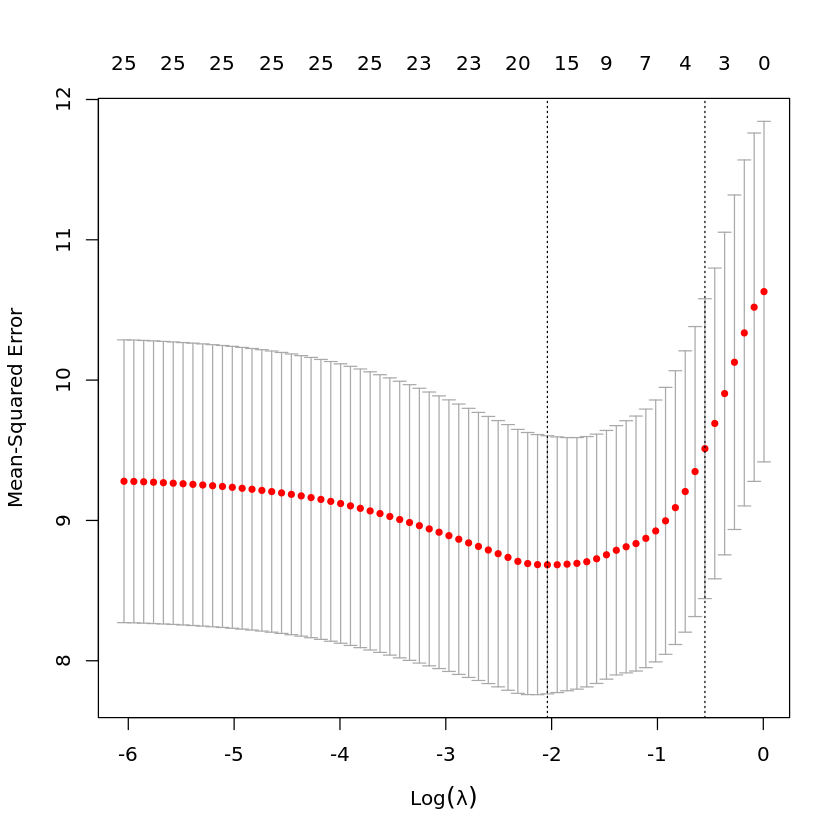

In [36]:
# Plot the cross-validation results
plot(lasso.cv)

## Results and Next Steps

After running the cross-validation, the optimal lambda λ value is stored within `lasso.cv` and can be accessed using `lasso.cv$lambda.min` for the lambda that minimizes MSE, or `lasso.cv$lambda.1se` for the most regularized model within one standard error of the minimum.

Understanding and selecting the optimal lambda allows us to balance model complexity and accuracy, tailoring our Lasso regression model to perform optimally on unseen data.

In the next steps of our analysis, we would use this optimal lambda value to re-estimate our Lasso model or proceed with model evaluation, such as calculating MSE on a test set to gauge the model's prediction accuracy.


In [21]:
# Print the optimal lambda value
print(paste0("Optimal lambda that minimizes cross-validated MSE: ", lasso.cv$lambda.min))
print(paste0("Optimal lambda using one-standard-error-rule: ", lasso.cv$lambda.1se))

[1] "Optimal lambda that minimizes cross-validated MSE: 0.207030691041174"
[1] "Optimal lambda using one-standard-error-rule: 0.524898263227888"


Visually, the minimized lambda after cross-validation would look as follows:

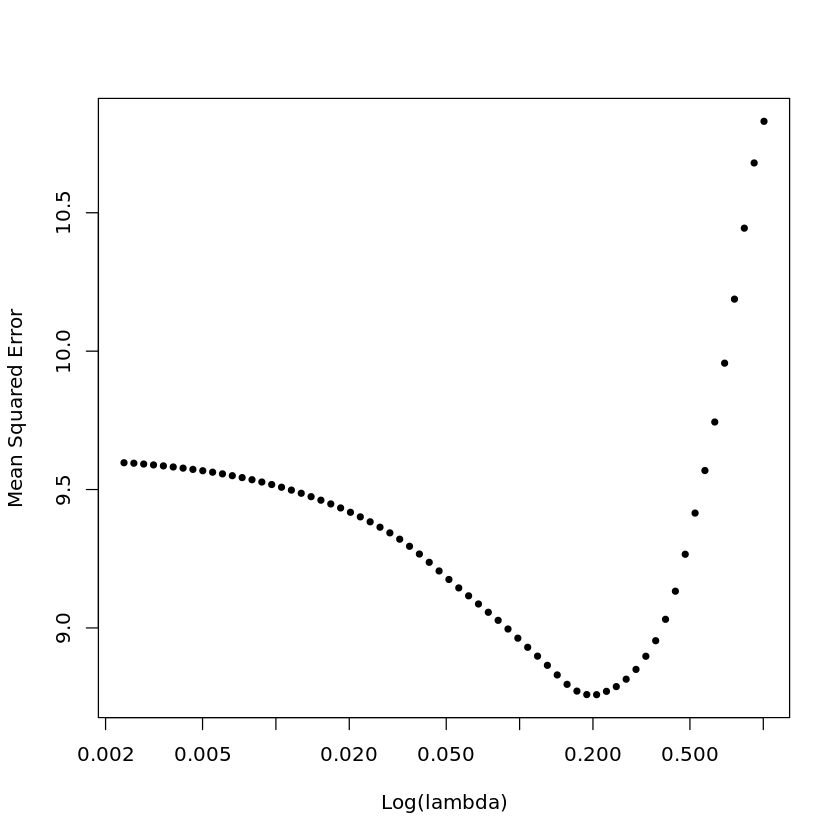

In [22]:

# Basic plot of the cross-validation curve
plot(lasso.cv$lambda, lasso.cv$cvm, type = "n", log = "x", xlab = "Log(lambda)", ylab = "Mean Squared Error")
points(lasso.cv$lambda, lasso.cv$cvm, pch = 20)  # Add the points


## Analyzing Lasso Coefficients and Calculating train Sample MSE

In the code snippet below, we examine the coefficients of the Lasso model corresponding to the optimal lambda value determined through cross-validation. In Lasso regression, certain coefficients may take on a value of zero, indicating that the associated control variables are excluded from the model. This property of Lasso aids in simplifying the model by removing less relevant variables, thereby enhancing interpretability and generalization to unseen data.


In [23]:
# Print Lasso coefficients
print(coef(lasso.cv, s = "lambda.min"))

# Save for later comparison
coef_lasso <- coef(lasso.cv, s = "lambda.min") 


26 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 12.250119359
sex         -0.253655764
age         -0.005993140
address      .          
famsize      .          
Pstatus      .          
Medu         0.205313808
Fedu         .          
traveltime   .          
studytime    0.225203556
failures    -0.735333357
schoolsup   -2.630320954
famsup      -0.264083469
paid        -0.007662322
activities   .          
nursery      .          
higher       .          
internet     0.290229577
romantic     .          
famrel       .          
freetime     .          
goout        .          
Dalc         .          
Walc        -0.310153714
health       .          
absences    -0.055696698


Here we can observe the influence of the Lasso penalty through the coefficients of our model at the optimal \( $\lambda$ \):

- **Zero Coefficients (represented by '.'):** Lasso has set several coefficients exactly to zero, which corresponds to the dot (.) entries in the output. These predictors are effectively removed from the model, suggesting that they do not contribute significantly to the prediction of the response variable within the context of this dataset and the regularization strength imposed by the optimal \( $\lambda$ \).

- **Non-zero Coefficients:** In contrast, non-zero coefficients are the predictors Lasso has identified as having a significant relationship with the response variable. These values have been shrunk relative to their ordinary least squares estimates, but not to zero, indicating their importance in the model.

The sparsity induced by Lasso is particularly evident for control variables such as 'address', 'Pstatus', 'Fedu', 'traveltime', 'nursery', 'higher', 'romantic', 'freetime', 'goout', and 'health', which have all been assigned a coefficient of zero and thus excluded from the model. This result aligns with the goal of Lasso to both predict the outcome effectively and identify the most relevant set of predictors by penalizing the inclusion of less impactful ones.


###  Evaluating Model Performance with Test Sample Mean Squared Error (MSE)

Following the coefficient analysis, we proceed to calculate the Mean Squared Error (MSE) in the test sample. The test sample MSE enables us to assess the performance of our Lasso model on unseen data and compare it with other estimators. By evaluating the model's accuracy on a separate test dataset, we ensure that our Lasso regression model can generalize effectively beyond the training data, providing reliable predictions in practical scenarios.

In [24]:
test$predlasso <- predict(lasso.cv, newx = as.matrix(test[,c(1:25)]), s = lasso.cv$lambda.min)

# Calculate the MSE
predMSElasso <- mean((test$G3 - test$predlasso)^2)
print(paste0("MSE: ", predMSElasso))

[1] "MSE: 8.86020510326351"


# Embracing Ridge Regularization

In this phase, we enhance our regression analysis by applying a Ridge penalty to the traditional linear regression framework. We utilize the first 25 columns as our predictors and incorporate the Ridge penalty (setting `alpha = 0` in some implementations, or directly calling a Ridge regression function depending on the software used). Ridge regression strives to minimize the residual sum of squares while also penalizing the sum of the squares of the coefficients. This penalty term controls the magnitude of the coefficients, which helps to manage multicollinearity and reduce model complexity. It does not, however, lead to zero coefficients; instead, it shrinks them towards zero, maintaining all features but with reduced influence. Here, `train$G3` is the dependent variable we aim to predict, leveraging the information gleaned from our selected predictors. And of course we will also carry out a regressor visualisation.

In [37]:
ridge <- glmnet(as.matrix(train[,c(1:25)]), train$G3, alpha = 0)


## Exploring Ridge Regression Coefficients: Visualizing Regularization Impact

- **Ridge Regression Visualization**:
  - This plot represents the coefficients of a Ridge regression model across different values of the regularization parameter, lambda.
  - As with Lasso, the x-axis has 'Log Lambda', with lambda values log-transformed.
  - The y-axis shows the coefficients' size for the predictors.
  - Each line corresponds to one of the predictors in the model.
  - Unlike Lasso, all coefficients tend to shrink smoothly but do not become exactly zero.

- **Comparing Lasso and Ridge**:
  - Ridge regression applies a penalty to the coefficients that shrinks them towards zero but does not set any to exactly zero.
  - This means that while coefficients are reduced in size, all variables stay in the model.
  - Lasso can exclude variables entirely by setting coefficients to zero, performing variable selection.
  - Ridge is more about reducing model complexity and multicollinearity without excluding predictors.

- **Implication for Model Selection**:
  - Ridge may be preferable when we suspect many small effects from the predictors.
  - Lasso is useful when we believe many predictors have no effect


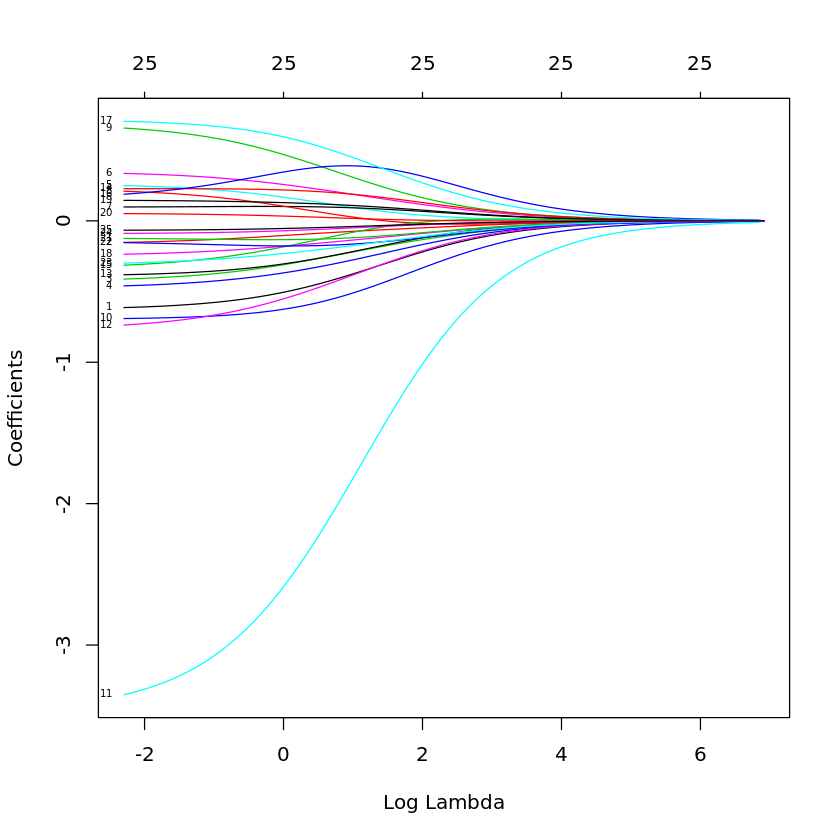

In [38]:
plot(ridge, xvar = "lambda", label = TRUE)

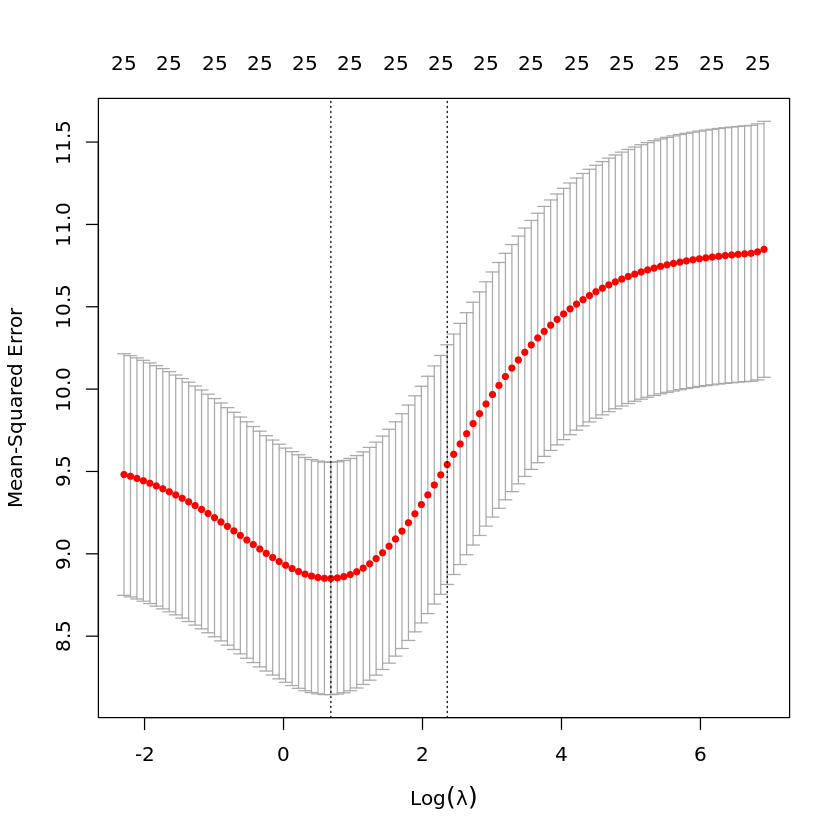

In [26]:
# Set starting value
set.seed(27112019)

# Cross-validate the Ridge model 
ridge.cv <- cv.glmnet(as.matrix(train[,c(1:25)]), train$G3, type.measure = "mse", nfolds = 5, alpha = 0)

plot(ridge.cv)

- **Ridge Regression Cross-Validation Plot**:
  - The plot shows cross-validated mean squared error (MSE) for a Ridge regression model at various lambda values.
  - The x-axis represents 'Log(λ)', the logarithm of the lambda values.
  - The y-axis shows the MSE for the given lambda on a cross-validated dataset.
  - The red line plots the average MSE for each lambda, while the bands show the range of plus or minus one standard error.

- **Bias-Variance Interpretation**:
  - High lambda values (right side) indicate a model with high bias. The model is simpler but may underfit the data.
  - Low lambda values (left side) suggest low bias but potentially high variance, which can lead to overfitting.
  - The optimal lambda, typically where the red line hits its minimum, balances bias and variance, leading to the best model performance on unseen data.

- **Choosing Optimal Lambda**:
  - The point where the red line is at its lowest represents the lambda value minimizing the MSE.
  - The one-standard-error rule may be applied here too, choosing a lambda within one standard error of the minimum MSE for better generalization.


In [27]:
# Print the optimal lambda value
print(paste0("Optimal lambda that minimizes cross-validated MSE: ", ridge.cv$lambda.min))
print(paste0("Optimal lambda using one-standard-error-rule: ", ridge.cv$lambda.1se))

[1] "Optimal lambda that minimizes cross-validated MSE: 1.97620826614986"
[1] "Optimal lambda using one-standard-error-rule: 10.5464291346655"


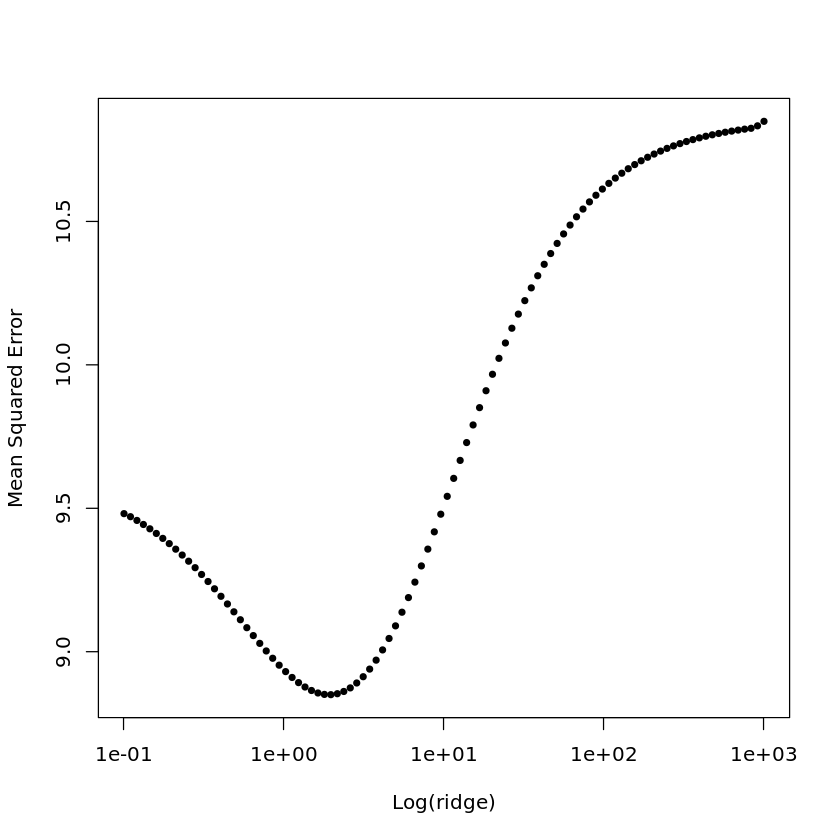

In [39]:

# Basic plot of the cross-validation curve
plot(ridge.cv$lambda, ridge.cv$cvm, type = "n", log = "x", xlab = "Log(ridge)", ylab = "Mean Squared Error")
points(ridge.cv$lambda, ridge.cv$cvm, pch = 20)  # Add the points


In [32]:
# Print Ridge coefficients
print(coef(ridge.cv, s = "lambda.min"))

# Save for later comparison
coef_ridge <- coef(ridge.cv, s = "lambda.min") 

26 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 12.94080662
sex         -0.42225544
age         -0.08314731
address     -0.24984549
famsize     -0.30876169
Pstatus      0.11796154
Medu         0.21089603
Fedu         0.09683688
traveltime   0.04969724
studytime    0.36062997
failures    -0.55560665
schoolsup   -2.08642928
famsup      -0.44044860
paid        -0.24836700
activities   0.20087023
nursery     -0.11340779
higher       0.38613173
internet     0.50139834
romantic    -0.15049638
famrel       0.11637309
freetime     0.02250704
goout       -0.12642101
Dalc        -0.17216585
Walc        -0.19404329
health      -0.05676600
absences    -0.04516606


In contrast to the Lasso model, the Ridge model keeps all control variables. Accordingly, Ridge is suited for dense models. In coparison to OLS, the Ridge coefficients are shrunken towards zero.





Following the cross-validation and optimal lambda selection for Ridge regression, we proceed with predicting the test sample using the fitted model. We estimate the values using the predict function and calculate the Mean Squared Error (MSE) to evaluate the model's performance on the test data. This process allows us to assess how well the Ridge regression model generalizes to new, unseen data, providing insights into its predictive accuracy.

In [29]:
test$predridge <- predict(ridge, newx = as.matrix(test[,c(1:25)]), s = ridge.cv$lambda.min)

# Calculate the MSE
predMSEridge <- mean((test$G3 - test$predridge)^2)
print(paste0("MSE: ", predMSEridge))

[1] "MSE: 8.31374220052241"


# Analyzing Coefficient Disparities in Multicollinear Variables

When addressing multicollinearity in regression analysis, the comparison of coefficients across Ordinary Least Squares (OLS), Lasso, and Ridge regression models offers revealing insights:

- **OLS Coefficients**:
  - OLS does not include any regularization term, and the coefficients for variables `Dalc` and `Walc` are estimated as -0.144564 and -0.3121625, respectively.
  - These coefficients represent the raw predictive power of each variable, unaffected by penalty terms.

- **Lasso Coefficients**:
  - The Lasso model's coefficients for `Dalc` and `Walc` are 0.0 and -0.3101537. The zero coefficient indicates that Lasso has entirely excluded `Dalc` from the model, likely due to its correlation with `Walc`.
  - This highlights Lasso's ability to perform feature selection, removing redundant or less important variables.

- **Ridge Coefficients**:
  - Ridge regression yields coefficients of -0.1721658 for `Dalc` and -0.1940433 for `Walc`, both shrunken towards zero but still included in the model.
  - The shrinkage is Ridge's way of dealing with multicollinearity, reducing the impact of closely related predictors without excluding them.

By comparing these coefficients, we can observe the distinctive approaches each method takes to tackle multicollinearity, with Lasso eliminating collinear variables and Ridge retaining but penalizing them.

**One last comment**: You might wonder why the Ridge coefficients are larger in magnitude than those from the OLS model, despite Ridge's penalty term designed to shrink coefficients. This counterintuitive result can occur when multicollinearity is present. In such cases, OLS estimates can be unduly influenced by the collinearity, leading to unreliable and highly variable coefficient estimates. Ridge regression, by adding a penalty on the size of the coefficients, can sometimes give a more stable and higher magnitude estimate that reflects the underlying effect more consistently when predictors are correlated.




In [33]:
# Pick the coefficients of Dalc and Walc
comp <- cbind(coef(ols)[23:24], coef_lasso[23:24], coef_ridge[23:24]) 
colnames(comp) <- c("OLS", "Lasso1", "Ridge")
print(comp)

            OLS     Lasso1      Ridge
Dalc -0.1445464  0.0000000 -0.1721658
Walc -0.3126125 -0.3101537 -0.1940433


# Comparing Regression Models: OLS, Lasso, and Ridge

The output you've observed represents the mean squared error (MSE) values for three different regression models applied to your dataset: Ordinary Least Squares (OLS), Lasso, and Ridge regression. MSE is a common measure used to quantify the error of a model's predictions, where a lower MSE value indicates a model with better predictive accuracy. Below is an explanation of each model's MSE in your output:

- **OLS Regression MSE (9.300887):** This MSE value is associated with the OLS regression model, the simplest form of linear regression that does not apply any regularization. The relatively higher MSE compared to the other models might suggest overfitting or a less effective capture of the underlying data structure.

- **Lasso Regression MSE (8.901193):** Lasso regression, which incorporates an L1 penalty leading to coefficient sparsity (setting some coefficients to zero), shows a slightly improved MSE. This indicates better generalization, likely due to its feature selection effect, which helps in reducing overfitting.

- **Ridge Regression MSE (8.313742):** The lowest MSE among the three models belongs to Ridge regression, which uses an L2 penalty to shrink the coefficients but not to zero. This suggests Ridge regression is the most accurate in predicting the data for this particular scenario. This improvement can be attributed to its capacity to handle multicollinearity more effectively than OLS, and potentially better than Lasso in this case.

In essence, this comparison indicates that for the specific dataset and conditions at hand, Ridge regression outperforms both Lasso and OLS regression in terms of predictive accuracy. This underscores the benefit of incorporating regularization (both L1 and L2) to enhance model performance by mitigating overfitting and dealing more adeptly with multicollinearity.


In [34]:
print(c(predMSEols, predMSElasso, predMSEridge))

[1] 9.300887 8.860205 8.313742
